In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import datetime


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
# helper functions
from sklearn.base import BaseEstimator, TransformerMixin
# from average_precision import apk

# https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/308635
def customer_hex_id_to_int(series):
    return series.str[-16:].apply(hex_id_to_int)

def hex_id_to_int(str):
    return int(str[-16:], 16)

def article_id_str_to_int(series):
    return series.astype('int32')

def article_id_int_to_str(series):
    return '0' + series.astype('str')

class Categorize(BaseEstimator, TransformerMixin):
    def __init__(self, min_examples=0):
        self.min_examples = min_examples
        self.categories = []
        
    def fit(self, X):
        for i in range(X.shape[1]):
            vc = X.iloc[:, i].value_counts()
            self.categories.append(vc[vc > self.min_examples].index.tolist())
        return self

    def transform(self, X):
        data = {X.columns[i]: pd.Categorical(X.iloc[:, i], categories=self.categories[i]).codes for i in range(X.shape[1])}
        return pd.DataFrame(data=data)

# 1. Data preprocessing

In [3]:
article = pd.read_csv('dataset/articles.csv')
customer = pd.read_csv('dataset/customers.csv')
transaction = pd.read_csv('dataset/transactions_train.csv')

#### 1.1 Transaction

In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [5]:
len(transaction.customer_id.unique())

1362281

In [6]:
transaction.t_dat = pd.to_datetime(transaction.t_dat) #, format='%y%m%d')

In [7]:
# transaction.customer_id = Categorize().fit_transform(transaction[['customer_id']]).customer_id

In [8]:
# min(transaction.t_dat), max(transaction.t_dat)

In [9]:
# transaction.customer_id = transaction.customer_id.astype('str')
# transaction.article_id = transaction.article_id.astype('int8')
# transaction.sales_channel_id = transaction.sales_channel_id.astype('int8')
# transaction.price = transaction.price.astype('float32')

In [10]:
transaction.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.5 GB


In [11]:
len(transaction.customer_id.unique())

1362281

In [12]:
transaction.sort_values(['t_dat', 'customer_id'], inplace=True)

In [13]:
transaction = transaction.reset_index(drop=True)

In [14]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [15]:
transaction.customer_id

0           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2           00007d2de826758b65a93dd24ce629ed66842531df6699...
3           00007d2de826758b65a93dd24ce629ed66842531df6699...
4           00007d2de826758b65a93dd24ce629ed66842531df6699...
                                  ...                        
31788319    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788320    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788321    fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...
31788322    fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...
31788323    fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...
Name: customer_id, Length: 31788324, dtype: object

In [16]:
import datetime

apply_df = transaction

max_date = max(apply_df.t_dat) 

l18m = max_date - datetime.timedelta(days=(360+180))
l15m = max_date - datetime.timedelta(days=360+90)
l12m = max_date - datetime.timedelta(days=360)
l9m = max_date - datetime.timedelta(days=270)
l6m = max_date - datetime.timedelta(days=180)
l3m = max_date - datetime.timedelta(days=90)


transaction_conditions = [
                            (apply_df['t_dat'] <= l18m),
                            (apply_df['t_dat'] > l18m) & (apply_df['t_dat'] <= l15m),
                            (apply_df['t_dat'] > l15m) & (apply_df['t_dat'] <= l12m),
                            (apply_df['t_dat'] > l12m) & (apply_df['t_dat'] <= l9m),
                            (apply_df['t_dat'] > l9m) & (apply_df['t_dat'] <= l6m),
                            (apply_df['t_dat'] > l6m) & (apply_df['t_dat'] <= l3m),
                            (apply_df['t_dat'] > l3m)
                        ] 

values = ['l2y','l18m','l15m','l12m','l9m','l6m','l3m']

apply_df['time_period'] = np.select(transaction_conditions, values)

In [17]:
transaction = apply_df

transaction

,t_dat,customer_id,article_id,price,sales_channel_id,time_period
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,l2y
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,l2y
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,l2y
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,l2y
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,l2y
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,l3m
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,l3m
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,l3m
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,l3m


In [18]:
# cus_0 = transaction[(transaction['customer_id'] == 0) & (transaction['time_period'] == 'l3m')]

# cus_0

In [19]:
transaction_master = pd.pivot_table(transaction, index=['customer_id','time_period'], values=['price'], aggfunc=[np.sum, np.count_nonzero])

In [20]:
transaction_master = pd.DataFrame(transaction_master)

transaction_master = transaction_master.stack()

transaction_master = transaction_master.reset_index()

transaction_master = transaction_master.rename(columns={'level_2':'value','sum':'order_value','count_nonzero':'order_number'})

transaction_master['abs'] = transaction_master['order_value']/transaction_master['order_number']

transaction_master

,customer_id,time_period,value,order_value,order_number,abs
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l12m,price,0.096220,4,0.024055
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l15m,price,0.186356,5,0.037271
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l18m,price,0.111814,3,0.037271
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l2y,price,0.110119,3,0.036706
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l3m,price,0.050831,1,0.050831
...,...,...,...,...,...,...
3842524,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l2y,price,0.416068,24,0.017336
3842525,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l3m,price,0.142203,10,0.014220
3842526,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l9m,price,0.033881,1,0.033881
3842527,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,l6m,price,0.209203,7,0.029886


In [21]:
transaction_master = transaction_master.drop('value', axis=1)

transaction_master

,customer_id,time_period,order_value,order_number,abs
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l12m,0.096220,4,0.024055
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l15m,0.186356,5,0.037271
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l18m,0.111814,3,0.037271
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l2y,0.110119,3,0.036706
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l3m,0.050831,1,0.050831
...,...,...,...,...,...
3842524,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l2y,0.416068,24,0.017336
3842525,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l3m,0.142203,10,0.014220
3842526,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l9m,0.033881,1,0.033881
3842527,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,l6m,0.209203,7,0.029886


In [22]:
transaction_master = pd.pivot_table(data=transaction_master,index='customer_id',values=['order_value','order_number','abs'],columns='time_period')

transaction_master = transaction_master.replace(np.nan,0)

transaction_master = transaction_master.reset_index()

transaction_master

customer_id       abs  \
time_period                                                         l12m   
0            00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.024055   
1            0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.050831   
2            000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.000000   
3            00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.000000   
4            00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.051890   
...                                                        ...       ...   
1362276      ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  0.007893   
1362277      ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  0.019588   
1362278      ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  0.017610   
1362279      ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  0.000000   
1362280      ffffd9ac14e89946416d80e791d064701994755c3ab686...  0.084729   

                                                                         \
time_period      l15m      l18m       l2y       l3m       l6m       l9m   
0            0.037271  0.037271  0.036706  0.050831  0.000000  0.018729   
1            0.028702  0.036353  0.036141  0.027102  0.024075  0.024872   
2            0.000000  0.000000  0.036424  0.061000  0.042864  0.023147   
3            0.000000  0.030492  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.027525  0.032186  0.042356  0.000000   
...               ...       ...       ...       ...       ...       ...   
1362276      0.000000  0.028576  0.000000  0.024418  0.022479  0.035576   
1362277      0.012907  0.026331  0.023900  0.013119  0.022375  0.025365   
1362278      0.020564  0.000000  0.017336  0.014220  0.000000  0.033881   
1362279      0.000000  0.000000  0.000000  0.000000  0.029886  0.000000   
1362280      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            order_number                                     order_value  \
time_period         l12m  l15m  l18m   l2y   l3m   l6m   l9m        l12m   
0                    4.0   5.0   3.0   3.0   1.0   0.0   5.0    0.096220   
1                    1.0  18.0  24.0   9.0   1.0  14.0  19.0    0.050831   
2                    0.0   0.0   0.0   4.0   1.0  10.0   3.0    0.000000   
3                    0.0   0.0   2.0   0.0   0.0   0.0   0.0    0.000000   
4                    2.0   0.0   0.0   4.0   4.0   3.0   0.0    0.103780   
...                  ...   ...   ...   ...   ...   ...   ...         ...   
1362276              3.0   0.0  23.0   0.0  12.0  11.0   2.0    0.023678   
1362277             12.0   8.0  11.0   9.0   8.0  18.0  18.0    0.235051   
1362278              3.0   7.0   0.0  24.0  10.0   0.0   1.0    0.052831   
1362279              0.0   0.0   0.0   0.0   0.0   7.0   0.0    0.000000   
1362280              1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.084729   

                                                                         
time_period      l15m      l18m       l2y       l3m       l6m       l9m  
0            0.186356  0.111814  0.110119  0.050831  0.000000  0.093644  
1            0.516644  0.872475  0.325271  0.027102  0.337051  0.472559  
2            0.000000  0.000000  0.145695  0.061000  0.428644  0.069441  
3            0.000000  0.060983  0.000000  0.000000  0.000000  0.000000  
4            0.000000  0.000000  0.110102  0.128746  0.127068  0.000000  
...               ...       ...       ...       ...       ...       ...  
1362276      0.000000  0.657237  0.000000  0.293017  0.247271  0.071153  
1362277      0.103254  0.289644  0.215102  0.104949  0.402746  0.456576  
1362278      0.143949  0.000000  0.416068  0.142203  0.000000  0.033881  
1362279      0.000000  0.000000  0.000000  0.000000  0.209203  0.000000  
1362280      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[1362281 rows x 22 columns]

In [23]:
transaction_master.columns = [f'{j}_{i}' for i,j in transaction_master.columns]

transaction_master

,_customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,0.018729,4.0,5.0,3.0,3.0,1.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,0.093644
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,0.024872,1.0,18.0,24.0,9.0,1.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,0.472559
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,0.023147,0.0,0.0,0.0,4.0,1.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,0.069441
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,0.000000
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.000000,2.0,0.0,0.0,4.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,0.035576,3.0,0.0,23.0,0.0,12.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,0.071153
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,0.025365,12.0,8.0,11.0,9.0,8.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,0.456576
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,0.033881,3.0,7.0,0.0,24.0,10.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,0.033881
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000


In [24]:
p21m_cols = ['l12m_order_number','l15m_order_number', 'l18m_order_number', 'l2y_order_number', 'l6m_order_number', 'l9m_order_number']

transaction_master['p21m_order_number'] = transaction_master[list(transaction_master[p21m_cols])].sum(axis=1)

# transaction_master[transaction_master.customer_id == 0].iloc[:,:16]
transaction_master['new_mb'] = np.where(transaction_master['p21m_order_number']==0,1,0)

transaction_master['new_mb'].value_counts()

0    1291147
1      71134
Name: new_mb, dtype: int64

In [25]:
# transaction_master = transaction_master[transaction_master['new_mb'] == 0]

transaction_master['churn_status'] = np.where(transaction_master['l3m_order_number']==0,1,0)

transaction_master = transaction_master.rename(columns={'_customer_id':'customer_id'})

transaction_master

,customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,new_mb,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,0.018729,4.0,5.0,3.0,3.0,1.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,0.093644,20.0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,0.024872,1.0,18.0,24.0,9.0,1.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,0.472559,85.0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,0.023147,0.0,0.0,0.0,4.0,1.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,0.069441,17.0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,0.000000,2.0,0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.000000,2.0,0.0,0.0,4.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,0.000000,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,0.035576,3.0,0.0,23.0,0.0,12.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,0.071153,39.0,0,0
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,0.025365,12.0,8.0,11.0,9.0,8.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,0.456576,76.0,0,0
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,0.033881,3.0,7.0,0.0,24.0,10.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,0.033881,35.0,0,0
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000,7.0,0,1


In [26]:
transaction_master = transaction_master.reset_index(drop=True)

#### 1.2 Customer

In [27]:
customer = pd.read_csv('dataset/customers.csv')

customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [28]:
customer['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [29]:
customer['FN'] = customer['FN'].replace(np.nan, 0)

In [30]:
customer['FN'].unique()

array([0., 1.])

In [31]:
customer['Active'] = customer['Active'].replace(np.nan, 0)

In [32]:
customer['Active'].unique()

array([0., 1.])

In [33]:
# customer.customer_id = 
# ().fit_transform(customer[['customer_id']]).customer_id
customer.club_member_status = Categorize().fit_transform(customer[['club_member_status']]).club_member_status
customer.postal_code = Categorize().fit_transform(customer[['postal_code']]).postal_code
customer.fashion_news_frequency = Categorize().fit_transform(customer[['fashion_news_frequency']]).fashion_news_frequency

In [34]:
customer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1371980 non-null  int8   
 4   fashion_news_frequency  1371980 non-null  int8   
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  int32  
dtypes: float64(3), int32(1), int8(2), object(1)
memory usage: 197.6 MB


In [35]:
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645


In [36]:
len(customer.customer_id.unique())

1371980

In [37]:
customer = customer.merge(transaction_master[['customer_id','new_mb']], on='customer_id', how='left')

customer = customer[customer['new_mb'] == 0]

customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,21.0,106737,0.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,18.0,111894,0.0


In [38]:
customer = customer.reset_index(drop=True)

#### 1.3 Article

In [39]:
article.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [40]:
for col in article.columns:
    if article[col].dtype == 'int64':
        article[col] = article[col].astype('int32')

In [41]:
article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [42]:
with pd.option_context("display.max_columns", None):
    display(article.head())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


#### 1.4 Data engineering (create cumulative columns)

In [43]:
# transaction_agg_date = pd.pivot_table(transaction, values=['price'], index=['customer_id','time_period'], columns=['sales_channel_id'],
#                                 aggfunc={'price':np.sum})

# transaction_agg_date = transaction_agg_date.reset_index()

# transaction_agg_date = pd.DataFrame(transaction_agg_date)

In [44]:
# transaction_agg_date.columns = ['customer_id','clv_l12m','clv_l18m','clv_l2m','clv_l2y','clv_l3m','clv_l6m']

# transaction_agg_date = transaction_agg_date.replace(np.nan,0)

# transaction_agg_date


In [45]:
# transaction_agg_date

#### 1.5 Create cumulative transactions L21M & L3M df

In [46]:
# max_date = max(transaction.t_dat) 


In [47]:
# import datetime

# latest_3_month = max_date - datetime.timedelta(days=90)

# latest_3_month

In [48]:
# transaction_traintest = transaction[transaction.t_dat < latest_3_month]
# transaction_valid = transaction[transaction.t_dat >= latest_3_month]

# transaction_traintest = transaction_traintest.reset_index(drop=True)
# transaction_valid = transaction_valid.reset_index(drop=True)

In [49]:
# max_traintest_date = max(transaction_traintest.t_dat) 

# latest_5_month_traintest = max_traintest_date - datetime.timedelta(days=150)

# transaction_train = transaction_traintest[transaction_traintest.t_dat < latest_5_month_traintest]
# transaction_test = transaction_traintest[transaction_traintest.t_dat >= latest_5_month_traintest]

# transaction_train = transaction_train.reset_index(drop=True)
# transaction_test = transaction_test.reset_index(drop=True)


In [50]:
# transaction.shape, transaction_traintest.shape, transaction_valid.shape

In [51]:
transaction_master

,customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,new_mb,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,0.018729,4.0,5.0,3.0,3.0,1.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,0.093644,20.0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,0.024872,1.0,18.0,24.0,9.0,1.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,0.472559,85.0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,0.023147,0.0,0.0,0.0,4.0,1.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,0.069441,17.0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,0.000000,2.0,0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.000000,2.0,0.0,0.0,4.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,0.000000,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,0.035576,3.0,0.0,23.0,0.0,12.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,0.071153,39.0,0,0
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,0.025365,12.0,8.0,11.0,9.0,8.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,0.456576,76.0,0,0
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,0.033881,3.0,7.0,0.0,24.0,10.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,0.033881,35.0,0,0
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000,7.0,0,1


In [52]:
transaction_master.new_mb.value_counts()

0    1291147
1      71134
Name: new_mb, dtype: int64

In [53]:
customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0
...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,21.0,106737,0.0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,18.0,111894,0.0


In [54]:
dataset = customer.merge(transaction_master, on='customer_id', how='left')

dataset = dataset[dataset.new_mb_x == 0]

dataset = dataset.reset_index(drop=True)

dataset

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb_x,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,new_mb_y,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,0.018729,4.0,5.0,3.0,3.0,1.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,0.093644,20.0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,0.024872,1.0,18.0,24.0,9.0,1.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,0.472559,85.0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,0.023147,0.0,0.0,0.0,4.0,1.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,0.069441,17.0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643,0.0,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,0.000000,2.0,0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.000000,2.0,0.0,0.0,4.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,0.000000,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,0.035576,3.0,0.0,23.0,0.0,12.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,0.071153,39.0,0,0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,0.025365,12.0,8.0,11.0,9.0,8.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,0.456576,76.0,0,0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,21.0,106737,0.0,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,0.033881,3.0,7.0,0.0,24.0,10.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,0.033881,35.0,0,0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,18.0,111894,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000,7.0,0,1


In [55]:
dataset.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'new_mb_x', 'l12m_abs',
       'l15m_abs', 'l18m_abs', 'l2y_abs', 'l3m_abs', 'l6m_abs', 'l9m_abs',
       'l12m_order_number', 'l15m_order_number', 'l18m_order_number',
       'l2y_order_number', 'l3m_order_number', 'l6m_order_number',
       'l9m_order_number', 'l12m_order_value', 'l15m_order_value',
       'l18m_order_value', 'l2y_order_value', 'l3m_order_value',
       'l6m_order_value', 'l9m_order_value', 'p21m_order_number', 'new_mb_y',
       'churn_status'],
      dtype='object')

In [56]:
dataset = dataset.drop(['l3m_order_number','l3m_order_value','l3m_abs','new_mb_y'], axis=1)

dataset = dataset.rename(columns={'new_mb_x':'new_mb'})

dataset

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0,0.024055,0.037271,0.037271,0.036706,0.000000,0.018729,4.0,5.0,3.0,3.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.000000,0.093644,20.0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0,0.050831,0.028702,0.036353,0.036141,0.024075,0.024872,1.0,18.0,24.0,9.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.337051,0.472559,85.0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0,0.000000,0.000000,0.000000,0.036424,0.042864,0.023147,0.0,0.0,0.0,4.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.428644,0.069441,17.0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643,0.0,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,2.0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0,0.051890,0.000000,0.000000,0.027525,0.042356,0.000000,2.0,0.0,0.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.127068,0.000000,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0,0.007893,0.000000,0.028576,0.000000,0.022479,0.035576,3.0,0.0,23.0,0.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.247271,0.071153,39.0,0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0,0.019588,0.012907,0.026331,0.023900,0.022375,0.025365,12.0,8.0,11.0,9.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.402746,0.456576,76.0,0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,21.0,106737,0.0,0.017610,0.020564,0.000000,0.017336,0.000000,0.033881,3.0,7.0,0.0,24.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.000000,0.033881,35.0,0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,18.0,111894,0.0,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000,7.0,1


In [57]:
dataset.new_mb.value_counts()

0.0    1291147
Name: new_mb, dtype: int64

In [58]:
# dataset.customer_id_encode = Categorize().fit_transform(dataset[['customer_id']]).customer_id

dataset

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0,0.024055,0.037271,0.037271,0.036706,0.000000,0.018729,4.0,5.0,3.0,3.0,0.0,5.0,0.096220,0.186356,0.111814,0.110119,0.000000,0.093644,20.0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0,0.050831,0.028702,0.036353,0.036141,0.024075,0.024872,1.0,18.0,24.0,9.0,14.0,19.0,0.050831,0.516644,0.872475,0.325271,0.337051,0.472559,85.0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0,0.000000,0.000000,0.000000,0.036424,0.042864,0.023147,0.0,0.0,0.0,4.0,10.0,3.0,0.000000,0.000000,0.000000,0.145695,0.428644,0.069441,17.0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,54.0,168643,0.0,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,2.0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0,0.051890,0.000000,0.000000,0.027525,0.042356,0.000000,2.0,0.0,0.0,4.0,3.0,0.0,0.103780,0.000000,0.000000,0.110102,0.127068,0.000000,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0,0.007893,0.000000,0.028576,0.000000,0.022479,0.035576,3.0,0.0,23.0,0.0,11.0,2.0,0.023678,0.000000,0.657237,0.000000,0.247271,0.071153,39.0,0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0,0.019588,0.012907,0.026331,0.023900,0.022375,0.025365,12.0,8.0,11.0,9.0,18.0,18.0,0.235051,0.103254,0.289644,0.215102,0.402746,0.456576,76.0,0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,21.0,106737,0.0,0.017610,0.020564,0.000000,0.017336,0.000000,0.033881,3.0,7.0,0.0,24.0,0.0,1.0,0.052831,0.143949,0.000000,0.416068,0.000000,0.033881,35.0,0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,18.0,111894,0.0,0.000000,0.000000,0.000000,0.000000,0.029886,0.000000,0.0,0.0,0.0,0.0,7.0,0.0,0.000000,0.000000,0.000000,0.000000,0.209203,0.000000,7.0,1


In [156]:
dataset.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'new_mb', 'l12m_abs',
       'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs', 'l9m_abs',
       'l12m_order_number', 'l15m_order_number', 'l18m_order_number',
       'l2y_order_number', 'l6m_order_number', 'l9m_order_number',
       'l12m_order_value', 'l15m_order_value', 'l18m_order_value',
       'l2y_order_value', 'l6m_order_value', 'l9m_order_value',
       'p21m_order_number', 'churn_status'],
      dtype='object')

#### 1.6 Normalize data

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [61]:
# dataset = dataset.drop(['new_mb'], axis=1)

In [62]:
dataset.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'new_mb', 'l12m_abs',
       'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs', 'l9m_abs',
       'l12m_order_number', 'l15m_order_number', 'l18m_order_number',
       'l2y_order_number', 'l6m_order_number', 'l9m_order_number',
       'l12m_order_value', 'l15m_order_value', 'l18m_order_value',
       'l2y_order_value', 'l6m_order_value', 'l9m_order_value',
       'p21m_order_number', 'churn_status'],
      dtype='object')

In [63]:
normalize_cols = ['age','postal_code', 'l12m_abs', 'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs',
       'l9m_abs', 'l12m_order_number', 'l15m_order_number',
       'l18m_order_number', 'l2y_order_number', 'l6m_order_number',
       'l9m_order_number', 'l12m_order_value', 'l15m_order_value',
       'l18m_order_value', 'l2y_order_value', 'l6m_order_value',
       'l9m_order_value', 'p21m_order_number']

# for col in normalize_cols:
#     scaled = scaler.fit_transform(dataset[col])

dataset[normalize_cols] = scaler.fit_transform(dataset[normalize_cols])

In [64]:
dataset

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.056998,0.073545,0.088313,0.072430,0.000000,0.036957,0.010336,0.013774,0.008357,0.004329,0.000000,0.020161,0.008549,0.008290,0.010641,0.006208,0.000000,0.009174,0.011845,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.120442,0.056637,0.086138,0.071315,0.071378,0.049078,0.002584,0.049587,0.066852,0.012987,0.042945,0.076613,0.004516,0.022983,0.083032,0.018338,0.032264,0.046293,0.052369,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.000000,0.000000,0.000000,0.071873,0.127085,0.045674,0.000000,0.000000,0.000000,0.005772,0.030675,0.012097,0.000000,0.000000,0.000000,0.008214,0.041032,0.006803,0.009975,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,0.457831,0.477880,0.0,0.000000,0.000000,0.072249,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.000000,0.000000,0.000000,0.000000,0.000000,0.005804,0.000000,0.000000,0.000000,0.000623,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477886,0.0,0.122952,0.000000,0.000000,0.054314,0.125578,0.000000,0.005168,0.000000,0.000000,0.005772,0.009202,0.000000,0.009221,0.000000,0.000000,0.006207,0.012164,0.000000,0.004988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,0.096386,0.142679,0.0,0.018701,0.000000,0.067709,0.000000,0.066647,0.070201,0.007752,0.000000,0.064067,0.000000,0.033742,0.008065,0.002104,0.000000,0.062548,0.000000,0.023670,0.006970,0.023691,0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,0.060241,0.227173,0.0,0.046412,0.025468,0.062391,0.047161,0.066337,0.050052,0.031008,0.022039,0.030641,0.012987,0.055215,0.072581,0.020884,0.004593,0.027565,0.012127,0.038553,0.044728,0.046758,0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,0.060241,0.302459,0.0,0.041727,0.040578,0.000000,0.034208,0.000000,0.066856,0.007752,0.019284,0.000000,0.034632,0.000000,0.004032,0.004694,0.006403,0.000000,0.023457,0.000000,0.003319,0.021197,0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,0.024096,0.317072,0.0,0.000000,0.000000,0.000000,0.000000,0.088607,0.000000,0.000000,0.000000,0.000000,0.000000,0.021472,0.000000,0.000000,0.000000,0.000000,0.000000,0.020026,0.000000,0.003741,1


In [65]:
dataset.churn_status.value_counts(normalize=True)

1    0.653187
0    0.346813
Name: churn_status, dtype: float64

In [185]:
dataset.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.056998,0.073545,0.088313,0.072430,0.000000,0.036957,0.010336,0.013774,0.008357,0.004329,0.000000,0.020161,0.008549,0.008290,0.010641,0.006208,0.000000,0.009174,0.011845,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.120442,0.056637,0.086138,0.071315,0.071378,0.049078,0.002584,0.049587,0.066852,0.012987,0.042945,0.076613,0.004516,0.022983,0.083032,0.018338,0.032264,0.046293,0.052369,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.000000,0.000000,0.000000,0.071873,0.127085,0.045674,0.000000,0.000000,0.000000,0.005772,0.030675,0.012097,0.000000,0.000000,0.000000,0.008214,0.041032,0.006803,0.009975,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,0.457831,0.477880,0.0,0.000000,0.000000,0.072249,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.000000,0.000000,0.000000,0.000000,0.000000,0.005804,0.000000,0.000000,0.000000,0.000623,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477886,0.0,0.122952,0.000000,0.000000,0.054314,0.125578,0.000000,0.005168,0.000000,0.000000,0.005772,0.009202,0.000000,0.009221,0.000000,0.000000,0.006207,0.012164,0.000000,0.004988,0


# 2. Churn Modeling

### 2.1 Churn Rate Exploration

<ipython-input-66-29e99187e31c>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

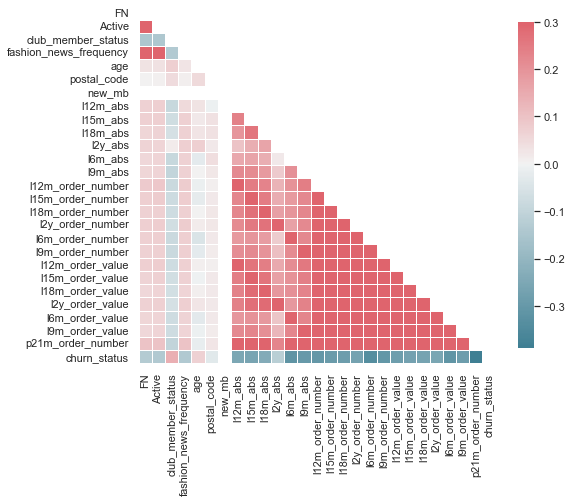

In [66]:
#Step 9.5. Plot Correlation Matrix of all independent variables------------------------
import seaborn as sn 

## Set and compute the Correlation Matrix
sn.set(style="white")
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(8, 12))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
dataset.churn_status.value_counts(normalize=True)

1    0.653187
0    0.346813
Name: churn_status, dtype: float64

In [68]:
dataset.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'new_mb', 'l12m_abs',
       'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs', 'l9m_abs',
       'l12m_order_number', 'l15m_order_number', 'l18m_order_number',
       'l2y_order_number', 'l6m_order_number', 'l9m_order_number',
       'l12m_order_value', 'l15m_order_value', 'l18m_order_value',
       'l2y_order_value', 'l6m_order_value', 'l9m_order_value',
       'p21m_order_number', 'churn_status'],
      dtype='object')

In [69]:
dataset = dataset.replace(np.nan,0)

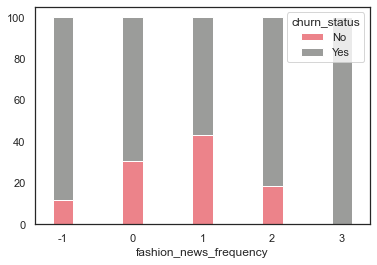

In [70]:
import matplotlib.ticker as mtick

# f, ax = plt.subplots(figsize=(4, 6))

contract_churn = dataset.groupby(['fashion_news_frequency','churn_status']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,4),
                                                                color = colors)


In [71]:
# Step 9.4. Find positive and negative correlations with the Response Variable--------------------
dataset2 = dataset.drop('churn_status', axis=1)

correlations = dataset2.corrwith(dataset.churn_status)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 club_member_status    0.140664
age                   0.059854
dtype: float64

Most Negative Correlations: 
 postal_code              -0.031738
l2y_abs                  -0.117364
FN                       -0.132276
Active                   -0.136659
fashion_news_frequency   -0.137899
l18m_abs                 -0.237974
l12m_abs                 -0.253872
l2y_order_value          -0.254771
l15m_abs                 -0.262225
l18m_order_value         -0.263720
l2y_order_number         -0.270005
l15m_order_value         -0.270996
l12m_order_value         -0.281721
l18m_order_number        -0.283878
l9m_order_value          -0.285778
l15m_order_number        -0.293688
l9m_abs                  -0.298633
l12m_order_number        -0.304613
l9m_order_number         -0.307501
l6m_order_value          -0.311853
l6m_abs                  -0.318007
l6m_order_number         -0.336502
p21m_order_number        -0.388736
dtype: float64


#### 2.2 Models

In [72]:
response = dataset["churn_status"]
cus_id = dataset["customer_id"]
traindata = dataset.drop(columns=["churn_status","customer_id"],axis=1)

In [108]:
ratio = int(round(traindata.shape[0]*0.9,0))

ratio

1162032

In [109]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(traindata, response,
#                                                     stratify=response, 
#                                                     test_size = 0.2, #use 0.9 if data is huge.
#                                                     random_state = 0)

X_train = traindata.iloc[:ratio,:]
y_train = response.iloc[:ratio]
cus_id_test = cus_id.iloc[:ratio]

X_test = traindata.iloc[ratio:,:]
y_test = response.iloc[ratio:]
cus_id_test = cus_id.iloc[ratio:]


#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1162032, 26)
Number transactions y_train dataset:  (1162032,)
Number transactions X_test dataset:  (129115, 26)
Number transactions y_test dataset:  (129115,)


In [75]:
X_train

,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number
0,0.0,0.0,0,0,0.397590,0.017866,0.0,0.056998,0.073545,0.088313,0.072430,0.000000,0.036957,0.010336,0.013774,0.008357,0.004329,0.000000,0.020161,0.008549,0.008290,0.010641,0.006208,0.000000,0.009174,0.011845
1,0.0,0.0,0,0,0.108434,0.095569,0.0,0.120442,0.056637,0.086138,0.071315,0.071378,0.049078,0.002584,0.049587,0.066852,0.012987,0.042945,0.076613,0.004516,0.022983,0.083032,0.018338,0.032264,0.046293,0.052369
2,0.0,0.0,0,0,0.096386,0.009201,0.0,0.000000,0.000000,0.000000,0.071873,0.127085,0.045674,0.000000,0.000000,0.000000,0.005772,0.030675,0.012097,0.000000,0.000000,0.000000,0.008214,0.041032,0.006803,0.009975
3,0.0,0.0,0,0,0.457831,0.477880,0.0,0.000000,0.000000,0.072249,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.000000,0.000000,0.000000,0.000000,0.000000,0.005804,0.000000,0.000000,0.000000,0.000623
4,1.0,1.0,0,1,0.433735,0.477886,0.0,0.122952,0.000000,0.000000,0.054314,0.125578,0.000000,0.005168,0.000000,0.000000,0.005772,0.009202,0.000000,0.009221,0.000000,0.000000,0.006207,0.012164,0.000000,0.004988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968355,1.0,1.0,0,1,0.096386,0.344933,0.0,0.046814,0.035084,0.022450,0.010000,0.000000,0.000000,0.007752,0.005510,0.058496,0.001443,0.000000,0.000000,0.005266,0.001582,0.018935,0.000286,0.000000,0.000000,0.016209
968356,0.0,0.0,0,0,0.120482,0.834292,0.0,0.019237,0.000000,0.059836,0.035920,0.000000,0.051806,0.005168,0.000000,0.030641,0.011544,0.000000,0.008065,0.001443,0.000000,0.026436,0.008210,0.000000,0.005144,0.013716
968357,0.0,0.0,0,0,0.313253,0.063265,0.0,0.000000,0.000000,0.000000,0.050134,0.000000,0.000000,0.000000,0.000000,0.000000,0.011544,0.000000,0.000000,0.000000,0.000000,0.000000,0.011459,0.000000,0.000000,0.004364
968358,0.0,0.0,0,0,0.204819,0.029765,0.0,0.000000,0.000000,0.058193,0.044381,0.049287,0.000000,0.000000,0.000000,0.027855,0.007215,0.033742,0.000000,0.000000,0.000000,0.023373,0.006340,0.017505,0.000000,0.015586


# Testing baseline models

In [76]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))


# models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


# models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [77]:
# acc_results = []
# auc_results = []
# names = []
# # set table to table to populate with performance results
# col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
#        'Accuracy Mean', 'Accuracy STD']

# model_results = pd.DataFrame(columns=col)
# i = 0
# # evaluate each model using k-fold cross-validation
# for name, model in models:
#     kfold = model_selection.KFold(
#         n_splits=10, random_state=0, shuffle=True)  # 10-fold cross-validation

#     cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
#         model, X_train, y_train, cv=kfold, scoring='accuracy')

#     cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
#         model, X_train, y_train, cv=kfold, scoring='roc_auc')

#     acc_results.append(cv_acc_results)
#     auc_results.append(cv_auc_results)
#     names.append(name)
#     model_results.loc[i] = [name,
#                          round(cv_auc_results.mean()*100, 2),
#                          round(cv_auc_results.std()*100, 2),
#                          round(cv_acc_results.mean()*100, 2),
#                          round(cv_acc_results.std()*100, 2)
#                          ]
#     i += 1
    
# model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

In [78]:
# #Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------

  
# #Using Accuracy Mean:
    
# fig = plt.figure(figsize=(8, 3))
# ax = fig.add_subplot(111)
# plt.boxplot(acc_results)
# ax.set_xticklabels(names)



# #plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
# #plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
# plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
# #plt.legend(loc='top right', fontsize = "medium")
# plt.xticks(rotation=0, horizontalalignment="center")
# plt.yticks(rotation=0, horizontalalignment="right")


# plt.show()

In [79]:
#--Step 15.4.1. Logistic Regression-----------------
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [81]:
results

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.76926,0.782334,0.896452,0.835515,0.871041
1,Random Forest,0.76723,0.808662,0.843517,0.825722,0.836308


In [82]:
#Step 15.4.6. Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)


In [83]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [84]:
#Step 15.4.5.  Naive Byes------------------------------------------------

# Fitting Naive Byes to the Training set:
    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [85]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [86]:
#Step 15.5. Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

#Since we have class imbalance. When we look into the business challenge, 
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1        Random Forest  0.767230   0.808662  0.843517  0.825722  0.836308
0  Logistic Regression  0.769260   0.782334  0.896452  0.835515  0.871041
2        Decision Tree  0.695576   0.768096  0.765417  0.766754  0.765952
3           Naive Byes  0.739212   0.745783  0.911920  0.820526  0.873024


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

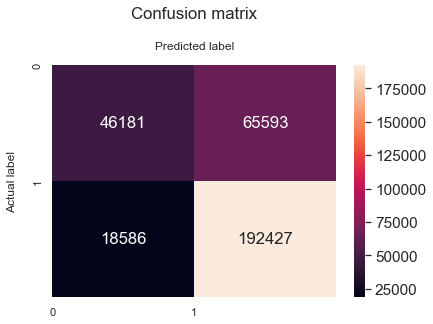

In [87]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

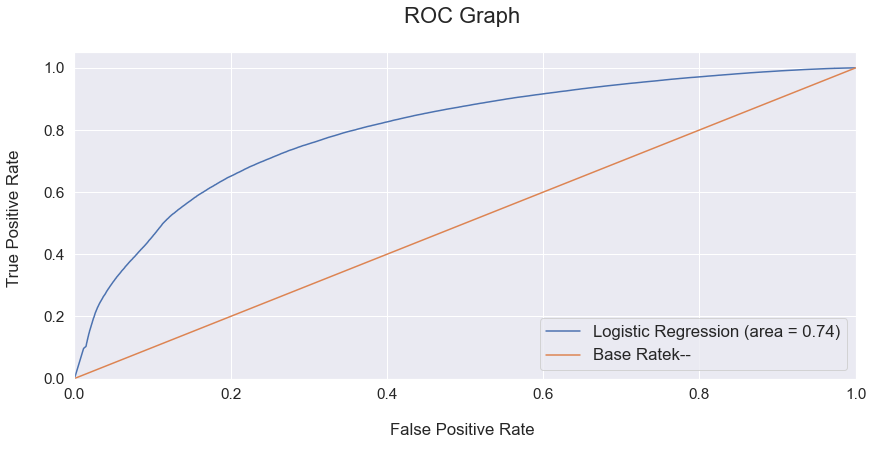

In [88]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

#### Improve Log Regression

In [90]:
# #Step 18:Hyper parameter Tuning  --------------------------------------


# # Round 1: -----------------------------------------------------------------
 
# # Select Regularization Method   
# import time
# penalty = ['l1', 'l2']

# # Create regularization hyperparameter space
# C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# # Combine Parameters
# parameters = dict(C=C, penalty=penalty)

# classifier = LogisticRegression(random_state = 0)

# lr_classifier = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = "balanced_accuracy",
#                            cv = 10,
#                            n_jobs = -1)
# t0 = time.time()
# lr_classifier  = lr_classifier.fit(X_train, y_train)
# t1 = time.time()
# print("Took %0.2f seconds" % (t1 - t0))

# lr_best_accuracy = lr_classifier.best_score_
# lr_best_parameters = lr_classifier.best_params_
# lr_best_accuracy, lr_best_parameters

# #verdict: No accuracy lift post hyperparameter tuning (round1)

# Fine tune LogReg

In [110]:
#Step 18.3:Final Hyper parameter tuning and selection --------------------------------------
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2', C = 100)
lr_classifier.fit(X_train, y_train)


# Predict the Test set results
y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# Step 19: Compare predictions against test set -------------------------------------------------------
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[ 59603  52171]
 [ 22168 188845]]


In [111]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.770205,0.783781,0.894362,0.835428,0.869818


In [114]:
# Step 19: Compare predictions against test set -------------------------------------------------------
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 

pd.crosstab(y_test,y_pred,rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,24137,20775
1,8895,75308


In [115]:
# Step 20: Format Final Results:-------------------------------------------------------

final_results = pd.concat([cus_id_test, y_test], axis = 1).dropna()

final_results['customer_id'] = cus_id_test

final_results['actual'] = y_test

final_results['predictions'] = y_pred 

final_results["churn_prob(%)"] = y_pred_probs 

final_results["churn_prob(%)"] = final_results["churn_prob(%)"]*100

final_results["churn_prob(%)"]=final_results["churn_prob(%)"].round(2)

final_results = final_results[['customer_id', 'actual', 'predictions', 'churn_prob(%)']]

# final_results ['Ranking'] = pd.qcut(final_results['churn_prob(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

final_results.head(30)

,customer_id,actual,predictions,churn_prob(%)
1162032,e670d3d0c1a5f1c16a1ccd8d7809e359b39d25a9e10573...,1,1,88.76
1162033,e670d4459ab2f0405be1fe37cac03a206391e2ee174027...,0,1,82.16
1162034,e670d447df1c4f31f811041b1c5aa48f3181044a93f679...,1,1,93.82
1162035,e670db7d537bfcb8bda5df23cce97218cc85cf947b6a9a...,1,1,86.89
1162036,e670ef5670d411ab0e1339ea9e537e87cba0e1353720d9...,1,1,84.93
1162037,e670fe96b433a19074bc34a5b130e9b0686fd7a1115a2b...,0,0,31.54
1162038,e67102ed77029a139d49f1c885c20c3e44ebd944f80bf7...,1,1,76.84
1162039,e6711096f5517711b18b1b81b26725ecaed00036bc5484...,1,0,15.84
1162040,e6711ce9e87e70d7f2e6bb3ee140a02169fdd3149535d3...,1,1,75.94
1162041,e671211332ccc2a8f0dbd80bd7dceb6596d69ec0a07b19...,0,0,46.75


In [116]:
final_results_v1 = final_results.to_csv('final_results_v1.csv')

# 3. Prediction for future

In [117]:
import pickle as pkl

In [118]:
saved_model = pkl.dumps(lr_classifier) 
lr_classifier_from_pickle = pkl.loads(saved_model) 

In [119]:
dataset

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churn_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.056998,0.073545,0.088313,0.072430,0.000000,0.036957,0.010336,0.013774,0.008357,0.004329,0.000000,0.020161,0.008549,0.008290,0.010641,0.006208,0.000000,0.009174,0.011845,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.120442,0.056637,0.086138,0.071315,0.071378,0.049078,0.002584,0.049587,0.066852,0.012987,0.042945,0.076613,0.004516,0.022983,0.083032,0.018338,0.032264,0.046293,0.052369,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.000000,0.000000,0.000000,0.071873,0.127085,0.045674,0.000000,0.000000,0.000000,0.005772,0.030675,0.012097,0.000000,0.000000,0.000000,0.008214,0.041032,0.006803,0.009975,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0,0,0.457831,0.477880,0.0,0.000000,0.000000,0.072249,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.000000,0.000000,0.000000,0.000000,0.000000,0.005804,0.000000,0.000000,0.000000,0.000623,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477886,0.0,0.122952,0.000000,0.000000,0.054314,0.125578,0.000000,0.005168,0.000000,0.000000,0.005772,0.009202,0.000000,0.009221,0.000000,0.000000,0.006207,0.012164,0.000000,0.004988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291142,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,0.096386,0.142679,0.0,0.018701,0.000000,0.067709,0.000000,0.066647,0.070201,0.007752,0.000000,0.064067,0.000000,0.033742,0.008065,0.002104,0.000000,0.062548,0.000000,0.023670,0.006970,0.023691,0
1291143,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,0.060241,0.227173,0.0,0.046412,0.025468,0.062391,0.047161,0.066337,0.050052,0.031008,0.022039,0.030641,0.012987,0.055215,0.072581,0.020884,0.004593,0.027565,0.012127,0.038553,0.044728,0.046758,0
1291144,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,0.060241,0.302459,0.0,0.041727,0.040578,0.000000,0.034208,0.000000,0.066856,0.007752,0.019284,0.000000,0.034632,0.000000,0.004032,0.004694,0.006403,0.000000,0.023457,0.000000,0.003319,0.021197,0
1291145,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,0.024096,0.317072,0.0,0.000000,0.000000,0.000000,0.000000,0.088607,0.000000,0.000000,0.000000,0.000000,0.000000,0.021472,0.000000,0.000000,0.000000,0.000000,0.000000,0.020026,0.000000,0.003741,1


### Create dataset for future prediction

#### a. Transaction

In [216]:
transaction_ft = pd.read_csv('dataset/transactions_train.csv')

In [217]:
transaction_ft.t_dat = pd.to_datetime(transaction_ft.t_dat) #, format='%y%m%d')

In [218]:
transaction_ft.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [219]:
import datetime

apply_df = transaction_ft

max_date = max(apply_df.t_dat) 

l18m = max_date - datetime.timedelta(days=(360+180))
l15m = max_date - datetime.timedelta(days=360+90)
l12m = max_date - datetime.timedelta(days=360)
l9m = max_date - datetime.timedelta(days=270)
l6m = max_date - datetime.timedelta(days=180)
l3m = max_date - datetime.timedelta(days=90)


transaction_conditions = [
                            (apply_df['t_dat'] <= l18m),
                            (apply_df['t_dat'] > l18m) & (apply_df['t_dat'] <= l15m),
                            (apply_df['t_dat'] > l15m) & (apply_df['t_dat'] <= l12m),
                            (apply_df['t_dat'] > l12m) & (apply_df['t_dat'] <= l9m),
                            (apply_df['t_dat'] > l9m) & (apply_df['t_dat'] <= l6m),
                            (apply_df['t_dat'] > l6m) & (apply_df['t_dat'] <= l3m),
                            (apply_df['t_dat'] > l3m)
                        ] 

values = ['l3m','l2y','l18m','l15m','l12m','l9m','l6m']

apply_df['time_period'] = np.select(transaction_conditions, values)

In [220]:
transaction_ft = apply_df

transaction_ft

,t_dat,customer_id,article_id,price,sales_channel_id,time_period
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,l3m
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,l3m
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,l3m
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,l3m
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,l3m
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,l6m
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,l6m
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,l6m
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,l6m


In [221]:
transaction_master_ft = pd.pivot_table(transaction_ft, index=['customer_id','time_period'], values=['price'], aggfunc=[np.sum, np.count_nonzero])

In [222]:
transaction_master_ft = pd.DataFrame(transaction_master_ft)

transaction_master_ft = transaction_master_ft.stack()

transaction_master_ft = transaction_master_ft.reset_index()

transaction_master_ft = transaction_master_ft.rename(columns={'level_2':'value','sum':'order_value','count_nonzero':'order_number'})

transaction_master_ft['abs'] = transaction_master_ft['order_value']/transaction_master_ft['order_number']

transaction_master_ft

,customer_id,time_period,value,order_value,order_number,abs
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l12m,price,0.093644,5,0.018729
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l15m,price,0.096220,4,0.024055
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l18m,price,0.186356,5,0.037271
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l2y,price,0.111814,3,0.037271
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,l3m,price,0.110119,3,0.036706
...,...,...,...,...,...,...
3842524,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l18m,price,0.143949,7,0.020564
3842525,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l3m,price,0.416068,24,0.017336
3842526,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,l6m,price,0.142203,10,0.014220
3842527,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,l9m,price,0.209203,7,0.029886


In [166]:
# transaction_master_ft = transaction_master_ft[transaction_master_ft['time_period'] != 'drop']

# transaction_master_ft = transaction_master_ft.reset_index(drop=True)

# transaction_master_ft

In [223]:
transaction_master_ft = pd.pivot_table(data=transaction_master_ft,index='customer_id',values=['order_value','order_number','abs'],columns='time_period')

transaction_master_ft = transaction_master_ft.replace(np.nan,0)

transaction_master_ft = transaction_master_ft.reset_index()

transaction_master_ft

customer_id       abs  \
time_period                                                         l12m   
0            00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.018729   
1            0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.024872   
2            000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.023147   
3            00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.000000   
4            00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.000000   
...                                                        ...       ...   
1362276      ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  0.035576   
1362277      ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  0.025365   
1362278      ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  0.033881   
1362279      ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  0.000000   
1362280      ffffd9ac14e89946416d80e791d064701994755c3ab686...  0.000000   

                                                                         \
time_period      l15m      l18m       l2y       l3m       l6m       l9m   
0            0.024055  0.037271  0.037271  0.036706  0.050831  0.000000   
1            0.050831  0.028702  0.036353  0.036141  0.027102  0.024075   
2            0.000000  0.000000  0.000000  0.036424  0.061000  0.042864   
3            0.000000  0.000000  0.030492  0.000000  0.000000  0.000000   
4            0.051890  0.000000  0.000000  0.027525  0.032186  0.042356   
...               ...       ...       ...       ...       ...       ...   
1362276      0.007893  0.000000  0.028576  0.000000  0.024418  0.022479   
1362277      0.019588  0.012907  0.026331  0.023900  0.013119  0.022375   
1362278      0.017610  0.020564  0.000000  0.017336  0.014220  0.000000   
1362279      0.000000  0.000000  0.000000  0.000000  0.000000  0.029886   
1362280      0.084729  0.000000  0.000000  0.000000  0.000000  0.000000   

            order_number                                     order_value  \
time_period         l12m  l15m  l18m   l2y   l3m   l6m   l9m        l12m   
0                    5.0   4.0   5.0   3.0   3.0   1.0   0.0    0.093644   
1                   19.0   1.0  18.0  24.0   9.0   1.0  14.0    0.472559   
2                    3.0   0.0   0.0   0.0   4.0   1.0  10.0    0.069441   
3                    0.0   0.0   0.0   2.0   0.0   0.0   0.0    0.000000   
4                    0.0   2.0   0.0   0.0   4.0   4.0   3.0    0.000000   
...                  ...   ...   ...   ...   ...   ...   ...         ...   
1362276              2.0   3.0   0.0  23.0   0.0  12.0  11.0    0.071153   
1362277             18.0  12.0   8.0  11.0   9.0   8.0  18.0    0.456576   
1362278              1.0   3.0   7.0   0.0  24.0  10.0   0.0    0.033881   
1362279              0.0   0.0   0.0   0.0   0.0   0.0   7.0    0.000000   
1362280              0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.000000   

                                                                         
time_period      l15m      l18m       l2y       l3m       l6m       l9m  
0            0.096220  0.186356  0.111814  0.110119  0.050831  0.000000  
1            0.050831  0.516644  0.872475  0.325271  0.027102  0.337051  
2            0.000000  0.000000  0.000000  0.145695  0.061000  0.428644  
3            0.000000  0.000000  0.060983  0.000000  0.000000  0.000000  
4            0.103780  0.000000  0.000000  0.110102  0.128746  0.127068  
...               ...       ...       ...       ...       ...       ...  
1362276      0.023678  0.000000  0.657237  0.000000  0.293017  0.247271  
1362277      0.235051  0.103254  0.289644  0.215102  0.104949  0.402746  
1362278      0.052831  0.143949  0.000000  0.416068  0.142203  0.000000  
1362279      0.000000  0.000000  0.000000  0.000000  0.000000  0.209203  
1362280      0.084729  0.000000  0.000000  0.000000  0.000000  0.000000  

[1362281 rows x 22 columns]

In [224]:
transaction_master_ft.columns = [f'{j}_{i}' for i,j in transaction_master_ft.columns]

transaction_master_ft

,_customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.018729,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,5.0,4.0,5.0,3.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.024872,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,19.0,1.0,18.0,24.0,9.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.023147,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,3.0,0.0,0.0,0.0,4.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.035576,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,2.0,3.0,0.0,23.0,0.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.025365,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,18.0,12.0,8.0,11.0,9.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.033881,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,1.0,3.0,7.0,0.0,24.0,10.0,0.0,0.033881,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203


In [262]:
transaction_master_ft = transaction_master_ft.drop(columns='churned_status')

transaction_master_ft

,customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.018729,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,5.0,4.0,5.0,3.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.024872,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,19.0,1.0,18.0,24.0,9.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.023147,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,3.0,0.0,0.0,0.0,4.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.035576,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,2.0,3.0,0.0,23.0,0.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.025365,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,18.0,12.0,8.0,11.0,9.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.033881,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,1.0,3.0,7.0,0.0,24.0,10.0,0.0,0.033881,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203


In [263]:
p21m_cols = ['l12m_order_number','l15m_order_number', 'l18m_order_number', 'l2y_order_number', 'l6m_order_number', 'l9m_order_number']

transaction_master_ft['p21m_order_number'] = transaction_master_ft[list(transaction_master_ft[p21m_cols])].sum(axis=1)

df_ = transaction_master_ft

# df_.loc[(df_['l12m_order_number']==0) | (df_['l15m_order_number']==0) | (df_['l18m_order_number']==0) | (df_['l2y_order_number']==0) | (df_['l3m_order_number']==0) | (df_['l6m_order_number']==0) | (df_['l9m_order_number']==0),'churned_status'] = 1

df_.loc[df_['l6m_order_number']==0,'churned_status'] = 1

df_['churned_status'] = df_['churned_status'].replace(np.nan,0)

df_

,customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churned_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.018729,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,5.0,4.0,5.0,3.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,18.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.024872,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,19.0,1.0,18.0,24.0,9.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,77.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.023147,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,3.0,0.0,0.0,0.0,4.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,14.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,2.0,1.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.035576,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,2.0,3.0,0.0,23.0,0.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,51.0,0.0
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.025365,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,18.0,12.0,8.0,11.0,9.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,75.0,0.0
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.033881,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,1.0,3.0,7.0,0.0,24.0,10.0,0.0,0.033881,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,21.0,0.0
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,7.0,1.0


In [265]:
df_.churned_status.value_counts()

1.0    843361
0.0    518920
Name: churned_status, dtype: int64

In [266]:
transaction_master_ft = df_

del df_

In [267]:
transaction_master_ft = transaction_master_ft.rename(columns={'_customer_id':'customer_id'})

transaction_master_ft

,customer_id,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churned_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.018729,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,5.0,4.0,5.0,3.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,18.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.024872,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,19.0,1.0,18.0,24.0,9.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,77.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.023147,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,3.0,0.0,0.0,0.0,4.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,14.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,0.000000,0.030492,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060983,0.000000,0.000000,0.000000,2.0,1.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.035576,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,2.0,3.0,0.0,23.0,0.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,51.0,0.0
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.025365,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,18.0,12.0,8.0,11.0,9.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,75.0,0.0
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.033881,0.017610,0.020564,0.000000,0.017336,0.014220,0.000000,1.0,3.0,7.0,0.0,24.0,10.0,0.0,0.033881,0.052831,0.143949,0.000000,0.416068,0.142203,0.000000,21.0,0.0
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029886,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209203,7.0,1.0


In [268]:
transaction_master_ft = transaction_master_ft.reset_index(drop=True)

#### b. Customer

In [269]:
customer_ft = pd.read_csv('dataset/customers.csv')

customer_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [270]:
customer_ft['FN'] = customer_ft['FN'].replace(np.nan, 0)

customer_ft['FN'].unique()

array([0., 1.])

In [271]:
customer_ft['Active'] = customer_ft['Active'].replace(np.nan, 0)

customer_ft['Active'].unique()

array([0., 1.])

In [272]:
# customer.customer_id = Categorize().fit_transform(customer[['customer_id']]).customer_id
customer_ft.club_member_status = Categorize().fit_transform(customer_ft[['club_member_status']]).club_member_status
customer_ft.postal_code = Categorize().fit_transform(customer_ft[['postal_code']]).postal_code
customer_ft.fashion_news_frequency = Categorize().fit_transform(customer_ft[['fashion_news_frequency']]).fashion_news_frequency

In [273]:
customer_ft = customer_ft.merge(transaction_master_ft[['customer_id','churned_status']], on='customer_id', how='left')

customer_ft = customer_ft[customer_ft['churned_status'] == 0]

customer_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churned_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0,0,20.0,42073,0.0
...,...,...,...,...,...,...,...,...
1371963,ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd...,0.0,0.0,0,0,27.0,38715,0.0
1371969,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,0,1,32.0,98244,0.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0


In [274]:
customer_ft = customer_ft.reset_index(drop=True)

#### c. future dataset

In [275]:
dataset_ft = customer_ft.merge(transaction_master_ft, on='customer_id', how='left')

dataset_ft = dataset_ft[dataset_ft.churned_status_x == 0]

dataset_ft = dataset_ft.reset_index(drop=True)

dataset_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churned_status_x,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l3m_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l3m_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l3m_order_value,l6m_order_value,l9m_order_value,p21m_order_number,churned_status_y
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0,0.018729,0.024055,0.037271,0.037271,0.036706,0.050831,0.000000,5.0,4.0,5.0,3.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.110119,0.050831,0.000000,18.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0,0.024872,0.050831,0.028702,0.036353,0.036141,0.027102,0.024075,19.0,1.0,18.0,24.0,9.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.325271,0.027102,0.337051,77.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0,0.023147,0.000000,0.000000,0.000000,0.036424,0.061000,0.042864,3.0,0.0,0.0,0.0,4.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.145695,0.061000,0.428644,14.0,0.0
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0,0.000000,0.051890,0.000000,0.000000,0.027525,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.110102,0.128746,0.127068,9.0,0.0
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0,0,20.0,42073,0.0,0.000000,0.023712,0.000000,0.021169,0.000000,0.038119,0.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.000000,0.047424,0.000000,0.042339,0.000000,0.076237,0.000000,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518915,ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd...,0.0,0.0,0,0,27.0,38715,0.0,0.029136,0.000000,0.041791,0.032751,0.016000,0.032356,0.000000,5.0,0.0,6.0,3.0,2.0,10.0,0.0,0.145678,0.000000,0.250746,0.098254,0.032000,0.323559,0.000000,24.0,0.0
518916,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,0,1,32.0,98244,0.0,0.021890,0.063542,0.016085,0.017610,0.030492,0.022017,0.024099,8.0,2.0,2.0,5.0,5.0,3.0,7.0,0.175119,0.127085,0.032169,0.088051,0.152458,0.066051,0.168695,27.0,0.0
518917,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0,0.035576,0.007893,0.000000,0.028576,0.000000,0.024418,0.022479,2.0,3.0,0.0,23.0,0.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.000000,0.293017,0.247271,51.0,0.0
518918,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0,0.025365,0.019588,0.012907,0.026331,0.023900,0.013119,0.022375,18.0,12.0,8.0,11.0,9.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.215102,0.104949,0.402746,75.0,0.0


In [276]:
dataset_ft.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'churned_status_x',
       'l12m_abs', 'l15m_abs', 'l18m_abs', 'l2y_abs', 'l3m_abs', 'l6m_abs',
       'l9m_abs', 'l12m_order_number', 'l15m_order_number',
       'l18m_order_number', 'l2y_order_number', 'l3m_order_number',
       'l6m_order_number', 'l9m_order_number', 'l12m_order_value',
       'l15m_order_value', 'l18m_order_value', 'l2y_order_value',
       'l3m_order_value', 'l6m_order_value', 'l9m_order_value',
       'p21m_order_number', 'churned_status_y'],
      dtype='object')

In [277]:
dataset_ft = dataset_ft.drop(['l3m_order_number','l3m_order_value','l3m_abs','churned_status_y'], axis=1)

dataset_ft = dataset_ft.rename(columns={'churned_status_x':'churned_status'})

dataset_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churned_status,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,49.0,6305,0.0,0.018729,0.024055,0.037271,0.037271,0.050831,0.000000,5.0,4.0,5.0,3.0,1.0,0.0,0.093644,0.096220,0.186356,0.111814,0.050831,0.000000,18.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,25.0,33726,0.0,0.024872,0.050831,0.028702,0.036353,0.027102,0.024075,19.0,1.0,18.0,24.0,1.0,14.0,0.472559,0.050831,0.516644,0.872475,0.027102,0.337051,77.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,24.0,3247,0.0,0.023147,0.000000,0.000000,0.000000,0.061000,0.042864,3.0,0.0,0.0,0.0,1.0,10.0,0.069441,0.000000,0.000000,0.000000,0.061000,0.428644,14.0
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,52.0,168645,0.0,0.000000,0.051890,0.000000,0.000000,0.032186,0.042356,0.0,2.0,0.0,0.0,4.0,3.0,0.000000,0.103780,0.000000,0.000000,0.128746,0.127068,9.0
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0,0,20.0,42073,0.0,0.000000,0.023712,0.000000,0.021169,0.038119,0.000000,0.0,2.0,0.0,2.0,2.0,0.0,0.000000,0.047424,0.000000,0.042339,0.076237,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518915,ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd...,0.0,0.0,0,0,27.0,38715,0.0,0.029136,0.000000,0.041791,0.032751,0.032356,0.000000,5.0,0.0,6.0,3.0,10.0,0.0,0.145678,0.000000,0.250746,0.098254,0.323559,0.000000,24.0
518916,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,0,1,32.0,98244,0.0,0.021890,0.063542,0.016085,0.017610,0.022017,0.024099,8.0,2.0,2.0,5.0,3.0,7.0,0.175119,0.127085,0.032169,0.088051,0.066051,0.168695,27.0
518917,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,24.0,50351,0.0,0.035576,0.007893,0.000000,0.028576,0.024418,0.022479,2.0,3.0,0.0,23.0,12.0,11.0,0.071153,0.023678,0.000000,0.657237,0.293017,0.247271,51.0
518918,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,21.0,80169,0.0,0.025365,0.019588,0.012907,0.026331,0.013119,0.022375,18.0,12.0,8.0,11.0,8.0,18.0,0.456576,0.235051,0.103254,0.289644,0.104949,0.402746,75.0


In [278]:
dataset_ft.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'churned_status',
       'l12m_abs', 'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs', 'l9m_abs',
       'l12m_order_number', 'l15m_order_number', 'l18m_order_number',
       'l2y_order_number', 'l6m_order_number', 'l9m_order_number',
       'l12m_order_value', 'l15m_order_value', 'l18m_order_value',
       'l2y_order_value', 'l6m_order_value', 'l9m_order_value',
       'p21m_order_number'],
      dtype='object')

In [279]:
normalize_cols = ['age','postal_code', 'l12m_abs', 'l15m_abs', 'l18m_abs', 'l2y_abs', 'l6m_abs',
       'l9m_abs', 'l12m_order_number', 'l15m_order_number',
       'l18m_order_number', 'l2y_order_number', 'l6m_order_number',
       'l9m_order_number', 'l12m_order_value', 'l15m_order_value',
       'l18m_order_value', 'l2y_order_value', 'l6m_order_value',
       'l9m_order_value', 'p21m_order_number']

# for col in normalize_cols:
#     scaled = scaler.fit_transform(dataset[col])

dataset_ft[normalize_cols] = scaler.fit_transform(dataset_ft[normalize_cols])

In [280]:
dataset_ft = dataset_ft.replace(np.nan,0)

dataset_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churned_status,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.036957,0.058890,0.073545,0.088313,0.099327,0.000000,0.020161,0.010336,0.013774,0.010714,0.000000,0.000000,0.009174,0.008549,0.022527,0.010641,0.003014,0.000000,0.011432
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.049078,0.124440,0.056637,0.086138,0.052454,0.071378,0.076613,0.002584,0.049587,0.085714,0.000000,0.042945,0.046293,0.004516,0.062454,0.083032,0.001591,0.032264,0.051110
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.045674,0.000000,0.000000,0.000000,0.119416,0.127085,0.012097,0.000000,0.000000,0.000000,0.000000,0.030675,0.006803,0.000000,0.000000,0.000000,0.003624,0.041032,0.008742
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477887,0.0,0.000000,0.127033,0.000000,0.000000,0.062498,0.125578,0.000000,0.005168,0.000000,0.000000,0.009009,0.009202,0.000000,0.009221,0.000000,0.000000,0.007685,0.012164,0.005380
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0,0,0.048193,0.119222,0.0,0.000000,0.058050,0.000000,0.050161,0.074216,0.000000,0.000000,0.005168,0.000000,0.007143,0.003003,0.000000,0.000000,0.004213,0.000000,0.004029,0.004537,0.000000,0.003362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518915,ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd...,0.0,0.0,0,0,0.132530,0.109706,0.0,0.057492,0.000000,0.082464,0.077604,0.062833,0.000000,0.020161,0.000000,0.016529,0.010714,0.027027,0.000000,0.014271,0.000000,0.030311,0.009351,0.019365,0.000000,0.015467
518916,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,0,1,0.192771,0.278393,0.0,0.043194,0.155560,0.031739,0.041727,0.042409,0.071450,0.032258,0.005168,0.005510,0.017857,0.006006,0.021472,0.017155,0.011291,0.003889,0.008380,0.003926,0.016148,0.017485
518917,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,0.096386,0.142679,0.0,0.070201,0.019322,0.000000,0.067709,0.047152,0.066647,0.008065,0.007752,0.000000,0.082143,0.033033,0.033742,0.006970,0.002104,0.000000,0.062548,0.017534,0.023670,0.033625
518918,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,0.060241,0.227174,0.0,0.050052,0.047953,0.025468,0.062391,0.024832,0.066337,0.072581,0.031008,0.022039,0.039286,0.021021,0.055215,0.044728,0.020884,0.012482,0.027565,0.006259,0.038553,0.049765


#### d. test prediction for future

In [281]:
lr_classifier_from_pickle

LogisticRegression(C=100, random_state=0)

In [282]:
X_new = dataset_ft.iloc[:,1:]

print("Number transactions X_train dataset: ", X_new.shape)

Number transactions X_train dataset:  (518920, 26)


In [283]:
new_churn_prediction = lr_classifier_from_pickle.predict(X_new)

new_churn_prediction

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- churned_status
Feature names seen at fit time, yet now missing:
- new_mb

  warnings.warn(message, FutureWarning)


array([1, 0, 0, ..., 0, 0, 0])

In [284]:
new_churn_proba = lr_classifier_from_pickle.predict_proba(X_new)
new_churn_proba = new_churn_proba[:,1]
new_churn_proba

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- churned_status
Feature names seen at fit time, yet now missing:
- new_mb

  warnings.warn(message, FutureWarning)


array([0.55184665, 0.13478981, 0.38685165, ..., 0.24746124, 0.07192996,
       0.43026806])

In [285]:
dataset_ft['new_churn_prediction'] = new_churn_prediction
dataset_ft['new_churn_proba'] = new_churn_proba


dataset_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,churned_status,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,new_churn_prediction,new_churn_proba
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.036957,0.058890,0.073545,0.088313,0.099327,0.000000,0.020161,0.010336,0.013774,0.010714,0.000000,0.000000,0.009174,0.008549,0.022527,0.010641,0.003014,0.000000,0.011432,1,0.551847
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.049078,0.124440,0.056637,0.086138,0.052454,0.071378,0.076613,0.002584,0.049587,0.085714,0.000000,0.042945,0.046293,0.004516,0.062454,0.083032,0.001591,0.032264,0.051110,0,0.134790
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.045674,0.000000,0.000000,0.000000,0.119416,0.127085,0.012097,0.000000,0.000000,0.000000,0.000000,0.030675,0.006803,0.000000,0.000000,0.000000,0.003624,0.041032,0.008742,0,0.386852
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477887,0.0,0.000000,0.127033,0.000000,0.000000,0.062498,0.125578,0.000000,0.005168,0.000000,0.000000,0.009009,0.009202,0.000000,0.009221,0.000000,0.000000,0.007685,0.012164,0.005380,0,0.328833
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0,0,0.048193,0.119222,0.0,0.000000,0.058050,0.000000,0.050161,0.074216,0.000000,0.000000,0.005168,0.000000,0.007143,0.003003,0.000000,0.000000,0.004213,0.000000,0.004029,0.004537,0.000000,0.003362,1,0.713205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518915,ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd...,0.0,0.0,0,0,0.132530,0.109706,0.0,0.057492,0.000000,0.082464,0.077604,0.062833,0.000000,0.020161,0.000000,0.016529,0.010714,0.027027,0.000000,0.014271,0.000000,0.030311,0.009351,0.019365,0.000000,0.015467,1,0.522376
518916,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,0,1,0.192771,0.278393,0.0,0.043194,0.155560,0.031739,0.041727,0.042409,0.071450,0.032258,0.005168,0.005510,0.017857,0.006006,0.021472,0.017155,0.011291,0.003889,0.008380,0.003926,0.016148,0.017485,0,0.155375
518917,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,0.096386,0.142679,0.0,0.070201,0.019322,0.000000,0.067709,0.047152,0.066647,0.008065,0.007752,0.000000,0.082143,0.033033,0.033742,0.006970,0.002104,0.000000,0.062548,0.017534,0.023670,0.033625,0,0.247461
518918,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,0.060241,0.227174,0.0,0.050052,0.047953,0.025468,0.062391,0.024832,0.066337,0.072581,0.031008,0.022039,0.039286,0.021021,0.055215,0.044728,0.020884,0.012482,0.027565,0.006259,0.038553,0.049765,0,0.071930


In [286]:
dataset_ft.to_csv('final_results_v3.csv')

In [287]:
dataset_ft['new_churn_prediction'].value_counts()

0    275005
1    243915
Name: new_churn_prediction, dtype: int64

In [291]:
# dataset_ft['predictions'].value_counts()

In [213]:
dataset.churn_status.value_counts()

1    843361
0    447786
Name: churn_status, dtype: int64

In [215]:
dataset_ft

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,new_mb,l12m_abs,l15m_abs,l18m_abs,l2y_abs,l6m_abs,l9m_abs,l12m_order_number,l15m_order_number,l18m_order_number,l2y_order_number,l6m_order_number,l9m_order_number,l12m_order_value,l15m_order_value,l18m_order_value,l2y_order_value,l6m_order_value,l9m_order_value,p21m_order_number,new_churn_prediction,new_churn_proba
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0,0,0.397590,0.017866,0.0,0.036957,0.056998,0.073545,0.088313,0.100301,0.000000,0.020161,0.010336,0.013774,0.008357,0.002994,0.000000,0.009174,0.008549,0.008290,0.010641,0.003047,0.000000,0.011254,0,0.462260
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0,0,0.108434,0.095569,0.0,0.049078,0.120442,0.056637,0.086138,0.053478,0.071378,0.076613,0.002584,0.049587,0.066852,0.002994,0.042945,0.046293,0.004516,0.022983,0.083032,0.001625,0.032264,0.041801,0,0.086785
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0,0,0.096386,0.009201,0.0,0.045674,0.000000,0.000000,0.000000,0.120368,0.127085,0.012097,0.000000,0.000000,0.000000,0.002994,0.030675,0.006803,0.000000,0.000000,0.000000,0.003657,0.041032,0.010450,0,0.354408
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0,1,0.433735,0.477886,0.0,0.000000,0.122952,0.000000,0.000000,0.063512,0.125578,0.000000,0.005168,0.000000,0.000000,0.011976,0.009202,0.000000,0.009221,0.000000,0.000000,0.007719,0.012164,0.006431,0,0.307607
4,000064249685c11552da43ef22a5030f35a147f723d5b0...,0.0,0.0,-1,-1,0.000000,0.000000,0.0,0.000000,0.080281,0.000000,0.000000,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.000000,0.000000,0.000000,0.009031,0.000000,0.000000,0.000000,0.000000,0.001608,1,0.806726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075024,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,0,0,0.096386,0.142679,0.0,0.070201,0.018701,0.000000,0.067709,0.048183,0.066647,0.008065,0.007752,0.000000,0.064067,0.035928,0.033742,0.006970,0.002104,0.000000,0.062548,0.017567,0.023670,0.021704,0,0.324372
1075025,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,0,0,0.060241,0.227173,0.0,0.050052,0.046412,0.025468,0.062391,0.025886,0.066337,0.072581,0.031008,0.022039,0.030641,0.023952,0.055215,0.044728,0.020884,0.004593,0.027565,0.006292,0.038553,0.050643,0,0.060244
1075026,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,0,1,0.060241,0.302459,0.0,0.066856,0.041727,0.040578,0.000000,0.028060,0.000000,0.004032,0.007752,0.019284,0.000000,0.029940,0.000000,0.003319,0.004694,0.006403,0.000000,0.008525,0.000000,0.016077,0,0.339660
1075027,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,0,1,0.024096,0.317072,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.088607,0.000000,0.000000,0.000000,0.000000,0.000000,0.021472,0.000000,0.000000,0.000000,0.000000,0.000000,0.020026,0.004823,1,0.658250


# Testing NN

In [292]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'